In [496]:
import numpy as np
import scipy.sparse as sp
import graphviz

Function Definition 1: Show the graph structure.

In [497]:
# show graph.
def ShowGraph(nodes, edges, mask = []):
    if len(mask) == 0:
        mask = np.zeros(len(nodes))
    dot = graphviz.Digraph()
    for i, n in enumerate(nodes):
        dot.node(n[0], n[-1],
                 style='filled', 
                 fillcolor='#CC0000' if mask[i] else '#FFFFFF')
    for e in edges:
        dot.edge(e[0], e[1], e[-1])
    display(dot)
    return 

Function Definition 2: Walk through the graph.

In [498]:
def GraphWalk(nodes, edges, mask, step=1, direction='forward', contained=0):
    # get node id dict.
    nodeIDs = dict((nID, idx) for idx, nID in enumerate(nodes.T[0]))
    # get the adjency matrix.
    nodesOut = [nodeIDs[n] for n in edges.T[0]]
    nodesIn = [nodeIDs[n] for n in edges.T[1]]
    A = sp.coo_matrix((np.ones(len(edges)), (nodesOut, nodesIn)), 
                      shape=(len(nodes), len(nodes)), dtype="float32")
    I = sp.eye(len(nodes)) # identity matrix.
    # calcualte total adjency matrix.
    if direction == 'forward':
        M = A
    elif direction == 'backward':
        M = A.T
    elif direction == 'bidirect':
        M = A + A.T
    if contained:
        temp = I
        while (step):
            temp += M ** step
            step -= 1
        M = temp
    else:
        M = M ** step
    # calcualte the mask.
    print(M.toarray())
    _mask_ = np.array([1 if i else 0 for i in mask * M])

    return _mask_

Step 1: Define a code graph.

In [499]:
# load graph.
nodes = np.array([['N0', -1, 'int L=0; int R=lenth-1;'],
                  ['N1', 0, 'int m=(L+R)/2;'],
                  ['N2', 0, 'if (x==a[n])'],
                  ['N3', 1, 'return m;'],
                  ['N4', 0, 'if (x<a[m])'],
                  ['N5', 0, 'L=m+1;'],
                  ['N6', 0, 'R=m-1;'],
                  ['N7', 0, 'while(L<=R)'],
                  ['N8', 0, 'return -1;']], dtype=object)
edges = np.array([['N0', 'N1', 'CFG', ''],
                  ['N1', 'N2', 'CFG', ''],
                  ['N2', 'N3', 'CFG', 'True'],
                  ['N2', 'N4', 'CFG', 'False'],
                  ['N4', 'N5', 'CFG', 'True'],
                  ['N4', 'N6', 'CFG', 'False'],
                  ['N5', 'N7', 'CFG', ''],
                  ['N6', 'N7', 'CFG', ''],
                  ['N7', 'N1', 'CFG', 'True'],
                  ['N7', 'N8', 'CFG', 'False']], dtype=object)

Initial status of graphs.

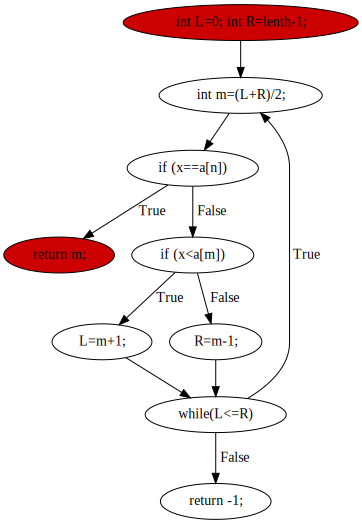

In [500]:
ShowGraph(nodes, edges, nodes.T[1])

Step 2: Initialize the start points for forward and backward checks.

In [501]:
# get changed nodes mask.
mask_first = np.array([1 if (n_type == -1) else 0 for n_type in nodes.T[1]])
mask_last = np.array([1 if (n_type == 1) else 0 for n_type in nodes.T[1]])

Step 3: Forward Checks.

[1 0 0 0 0 0 0 0 0]
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 1 0 0 0 0 0 0 0]


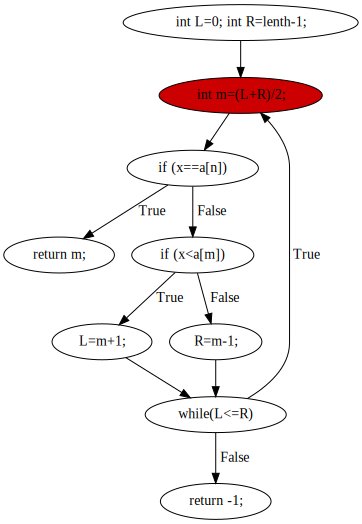

In [502]:
# forward check
print(mask_first)
mask_first = GraphWalk(nodes, edges, mask_first, step=1)
print(mask_first)
ShowGraph(nodes, edges, mask_first)

Step 4: Backward Checks.

[0 0 0 1 0 0 0 0 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[0 0 1 0 0 0 0 0 0]


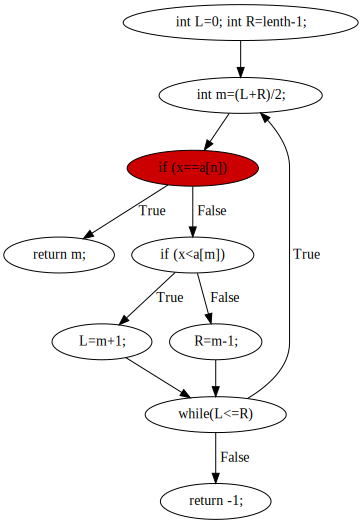

In [503]:
# backward check
print(mask_last)
mask_last = GraphWalk(nodes, edges, mask_last, step=1, direction='backward')
print(mask_last)
ShowGraph(nodes, edges, mask_last)